In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from gensim.models import Word2Vec
# define training data
sentences = [['this', 'is', 'the', 'first', 'sentence', 'for', 'word2vec'],
			['this', 'is', 'the', 'second', 'sentence'],
			['yet', 'another', 'sentence'],
			['one', 'more', 'sentence'],
			['and', 'the', 'final', 'sentence']]


In [ ]:
# train model
model = Word2Vec(sentences, min_count=1)


In [ ]:
# summarize the loaded model
print(model)


Word2Vec(vocab=14, size=100, alpha=0.025)


In [ ]:
# summarize vocabulary
words = list(model.wv.vocab)
print(words)

['this', 'is', 'the', 'first', 'sentence', 'for', 'word2vec', 'second', 'yet', 'another', 'one', 'more', 'and', 'final']


In [ ]:
# access vector for one word
print(model['sentence'])

[-3.7093530e-03  4.2886124e-03 -2.6140225e-03  2.5869024e-03
 -1.2882795e-03  1.3275653e-03  4.0742517e-03 -3.8260366e-03
 -2.7826673e-03  3.2769714e-03  3.0225820e-03  9.1138463e-05
  4.9119522e-03  1.7595780e-03  4.6850815e-03 -3.4968925e-03
  1.4102884e-03  2.1851056e-03  4.7630197e-03  3.9183064e-03
 -2.1171907e-03  5.9385650e-04  1.7232144e-04 -3.6591991e-05
 -7.7304710e-04 -7.9456589e-04 -1.6966523e-03  3.0272892e-03
  1.6549214e-03  1.7951388e-03  9.8515372e-04  3.9688605e-03
 -2.2700287e-03  4.9226952e-04  1.1842404e-03 -1.7523809e-03
  4.2955141e-04 -7.4843800e-04  2.6260498e-03  1.7909526e-03
 -2.9587273e-03 -2.5088547e-03 -1.6582113e-04  2.4417284e-04
 -1.3769310e-03 -6.7661458e-04 -3.4253076e-03 -1.8384695e-03
 -3.0763730e-04  1.5339677e-03  4.1134842e-03  1.4926576e-03
 -2.1797204e-03  4.2662779e-03 -3.8895304e-03 -4.2731804e-03
 -1.3253932e-03  4.2943736e-03  2.5614323e-03  1.8281456e-03
  2.8898055e-03 -9.3928631e-04 -4.5672222e-03 -3.5527986e-03
  1.7577809e-03 -2.96190

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


In [ ]:
# save model
model.save('model.bin')
# load model
new_model = Word2Vec.load('model.bin')
print(new_model)

Word2Vec(vocab=14, size=100, alpha=0.025)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  This is separate from the ipykernel package so we can avoid doing imports until


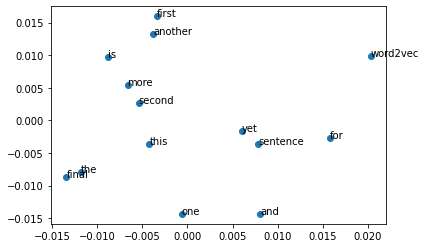

In [ ]:
from sklearn.decomposition import PCA
from matplotlib import pyplot
X = model[model.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)
# create a scatter plot of the projection
pyplot.scatter(result[:, 0], result[:, 1])
words = list(model.wv.vocab)
for i, word in enumerate(words):
	pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()

In [ ]:
cd /content/drive/My Drive/Colab Notebooks

/content/drive/My Drive/Colab Notebooks


In [ ]:
from gensim.scripts.glove2word2vec import glove2word2vec
glove_input_file = 'glove.6B.50d.txt' # https://nlp.stanford.edu/projects/glove/
word2vec_output_file = 'glove.6B.50d.txt.word2vec'
glove2word2vec(glove_input_file, word2vec_output_file)

(400000, 50)

In [ ]:
from gensim.models import KeyedVectors
filename = 'glove.6B.50d.txt.word2vec'
model = KeyedVectors.load_word2vec_format(filename, binary=False)

In [ ]:
result = model.most_similar(positive=['woman', 'king'], negative=['man'], topn=1)
print(result)

[('queen', 0.8523603677749634)]


In [ ]:
print(model['king'])

[ 0.50451   0.68607  -0.59517  -0.022801  0.60046  -0.13498  -0.08813
  0.47377  -0.61798  -0.31012  -0.076666  1.493    -0.034189 -0.98173
  0.68229   0.81722  -0.51874  -0.31503  -0.55809   0.66421   0.1961
 -0.13495  -0.11476  -0.30344   0.41177  -2.223    -1.0756   -1.0783
 -0.34354   0.33505   1.9927   -0.04234  -0.64319   0.71125   0.49159
  0.16754   0.34344  -0.25663  -0.8523    0.1661    0.40102   1.1685
 -1.0137   -0.21585  -0.15155   0.78321  -0.91241  -1.6106   -0.64426
 -0.51042 ]


In [ ]:
print(model['man'])

[-0.094386  0.43007  -0.17224  -0.45529   1.6447    0.40335  -0.37263
  0.25071  -0.10588   0.10778  -0.10848   0.15181  -0.65396   0.55054
  0.59591  -0.46278   0.11847   0.64448  -0.70948   0.23947  -0.82905
  1.272     0.033021  0.2935    0.3911   -2.8094   -0.70745   0.4106
  0.3894   -0.2913    2.6124   -0.34576  -0.16832   0.25154   0.31216
  0.31639   0.12539  -0.012646  0.22297  -0.56585  -0.086264  0.62549
 -0.0576    0.29375   0.66005  -0.53115  -0.48233  -0.97925   0.53135
 -0.11725 ]


In [ ]:
print(model['woman'])

[-1.8153e-01  6.4827e-01 -5.8210e-01 -4.9451e-01  1.5415e+00  1.3450e+00
 -4.3305e-01  5.8059e-01  3.5556e-01 -2.5184e-01  2.0254e-01 -7.1643e-01
  3.0610e-01  5.6127e-01  8.3928e-01 -3.8085e-01 -9.0875e-01  4.3326e-01
 -1.4436e-02  2.3725e-01 -5.3799e-01  1.7773e+00 -6.6433e-02  6.9795e-01
  6.9291e-01 -2.6739e+00 -7.6805e-01  3.3929e-01  1.9695e-01 -3.5245e-01
  2.2920e+00 -2.7411e-01 -3.0169e-01  8.5286e-04  1.6923e-01  9.1433e-02
 -2.3610e-02  3.6236e-02  3.4488e-01 -8.3947e-01 -2.5174e-01  4.2123e-01
  4.8616e-01  2.2325e-02  5.5760e-01 -8.5223e-01 -2.3073e-01 -1.3138e+00
  4.8764e-01 -1.0467e-01]
